In [1]:
!curl -O https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 5565k    0 25138    0     0  14397      0  0:06:35  0:00:01  0:06:34 14405
 15 5565k   15  879k    0     0   324k      0  0:00:17  0:00:02  0:00:15  324k
 37 5565k   37 2079k    0     0   560k      0  0:00:09  0:00:03  0:00:06  560k
 50 5565k   50 2799k    0     0   593k      0  0:00:09  0:00:04  0:00:05  594k
 80 5565k   80 4479k    0     0   783k      0  0:00:07  0:00:05  0:00:02  911k
100 5565k  100 5565k    0     0   880k      0  0:00:06  0:00:06 --:--:-- 1212k


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('tmdb_5000_movies.csv')

In [4]:
x=df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [5]:
type(x['genres'])

str

In [6]:
x['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [7]:
import json

In [8]:
j=json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [9]:
' '.join(''.join(jj['name'].split()) for jj in j)


'Action Adventure Fantasy ScienceFiction'

In [10]:
def genres_and_keywords_to_string(row):
    genres=json.loads(row['genres'])
    genres=' '.join(''.join(jj['name'].split() ) for jj in genres)

    keywords=json.loads(row['keywords'])
    keywords=' '.join(''.join(bb['name'].split()) for bb in keywords)

    return "%s %s" % (genres,keywords)

In [11]:
df['string']=df.apply(genres_and_keywords_to_string,axis=1)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [13]:
tfidf=TfidfVectorizer(max_features=2000)

In [14]:
X=tfidf.fit_transform(df['string'])
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 37285 stored elements and shape (4803, 2000)>

In [15]:
movie2idx=pd.Series(df.index,index=df['title'])

In [16]:
movie2idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [17]:
idx=movie2idx["Scream 3"]
idx

np.int64(1164)

In [18]:
query=X[idx]

In [19]:
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 2000))

In [28]:
from sklearn.metrics.pairwise import cosine_similarity


In [21]:
scores=cosine_similarity(query,X)
scores

array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 4803))

In [22]:
scores=scores.flatten()

In [23]:
import matplotlib.pyplot as plt


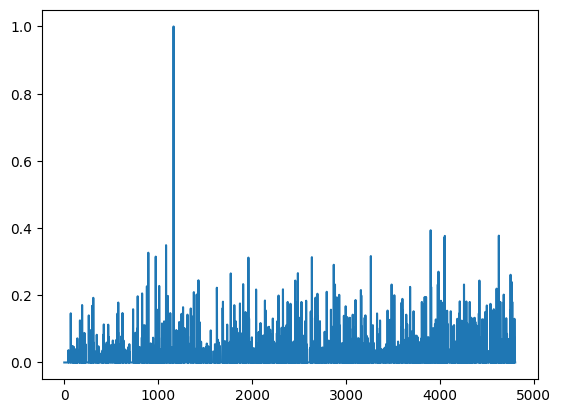

In [24]:
plt.plot(scores)

In [25]:
(-scores).argsort()

array([1164, 3902, 4628, ..., 4801, 4802,    0], shape=(4803,))

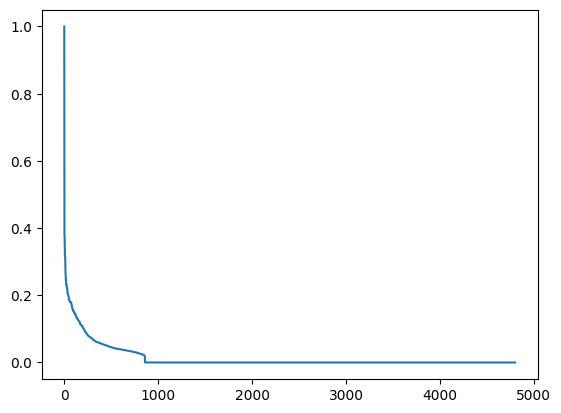

In [26]:
plt.plot(scores[(-scores).argsort()]);

In [27]:
recommended_idx=(-scores).argsort()[1:6]

df["title"].iloc[recommended_idx]

3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object

In [29]:
def recommend(title):
    idx=movie2idx[title]
    if type(idx)==pd.Series:
        idx=idx.iloc[0]

    query=X[idx]
    scores=cosine_similarity(query,X)
    scores=scores.flatten()
    recommended_idx=(-scores).argsort()[1:6]
    return df["title"].iloc[recommended_idx]

In [30]:
print(recommend("Scream 3"))

3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object
